In [2]:
from Bio.PDB import *
from Bio.PDB import DSSP

In [3]:
import pickle
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [5]:
p = PDBParser()
structure = p.get_structure("ubq", "1ubq.pdb")

In [6]:
model = structure[0]

In [7]:
 with open('1ubq_dssp.pickle', 'rb') as f:
        dssp = pickle.load(f)

In [25]:
fit = pd.read_csv("./fit/tau_4_exp.csv")
fit_3 = pd.read_csv("./fit/tau_3_exp.csv")
fit_2 = pd.read_csv("./fit/tau_2_exp.csv")

parameter_order_4 = fit.constant
parameter_order_3 = fit_3.constant
parameter_order_2 = fit_2.constant

In [ ]:
rides = fit.rId
rnames = [rname[0] for rname in fit.rName]
anames = fit.aName

In [10]:
secondary_structure = []
secondary_structure_dict = {'H':'α-helix', 'E': 'Strand', 'B': 'Isolated β-bridge residue',
                           'G': '3-10 helix', 'I': 'Π-helix', 'T': 'Turn', 'S': 'Bend', '-': '-'}
for rid in rides:
    a_key = list(dssp.keys())[rid]
    elem = dssp[a_key][2]
    secondary_structure.append(secondary_structure_dict[elem])

In [11]:
color_dict = {'α-helix': 'black', 'Isolated β-bridge residue': 'red', 'Strand': 'green','3-10 helix': 'blue',
              'Π-helix': 'cyan', 'Turn': '#afeeee', 'Bend': 'burlywood', '-': 'chartreuse'}

In [12]:
color = [color_dict[element] for element in list(secondary_structure)]

In [13]:
names = ["_".join(elem) for elem in zip(rnames, rides.astype(str), anames)]

In [14]:
bars = names
y_pos = np.arange(len(bars))

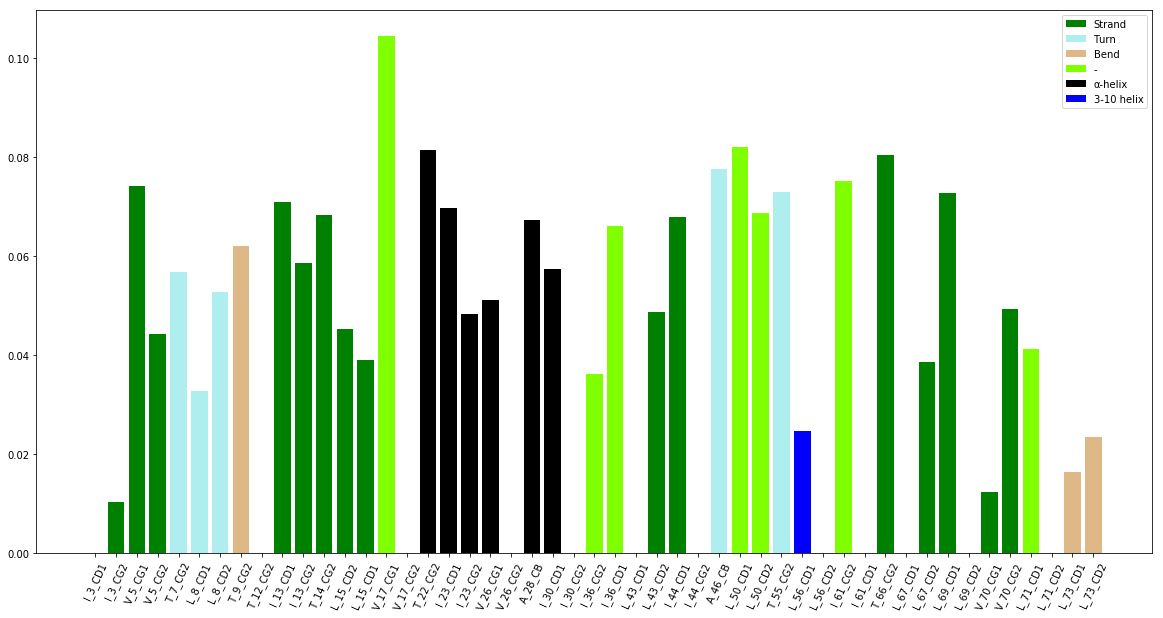

In [15]:
height = parameter_order_4
use =set()
plt.figure(figsize=(20,10))
for j in range(len(height)):
    label = secondary_structure[j]
    if label in use:
        label = None
    plt.bar(y_pos[j], height[j], color=color[j], label=label)
    use.add(secondary_structure[j])
plt.xticks(y_pos, bars, rotation=65)
plt.legend()
plt.show()

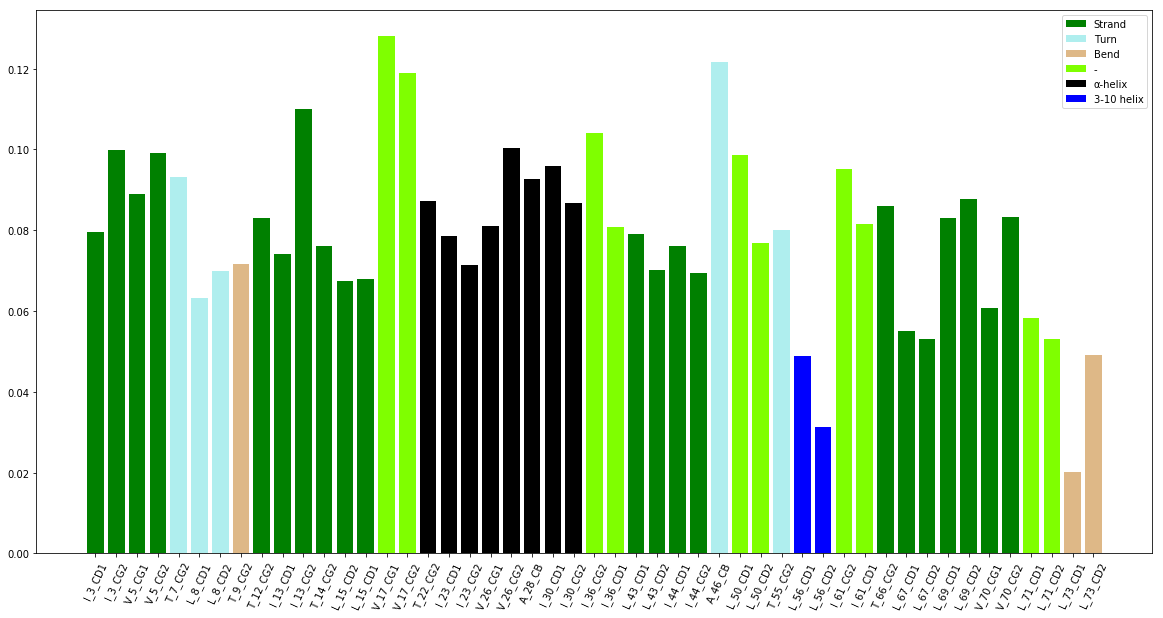

In [26]:
height = parameter_order_3
use =set()
plt.figure(figsize=(20,10))
for j in range(len(height)):
    label = secondary_structure[j]
    if label in use:
        label = None
    plt.bar(y_pos[j], height[j], color=color[j], label=label)
    use.add(secondary_structure[j])
plt.xticks(y_pos, bars, rotation=65)
plt.legend()
plt.show()

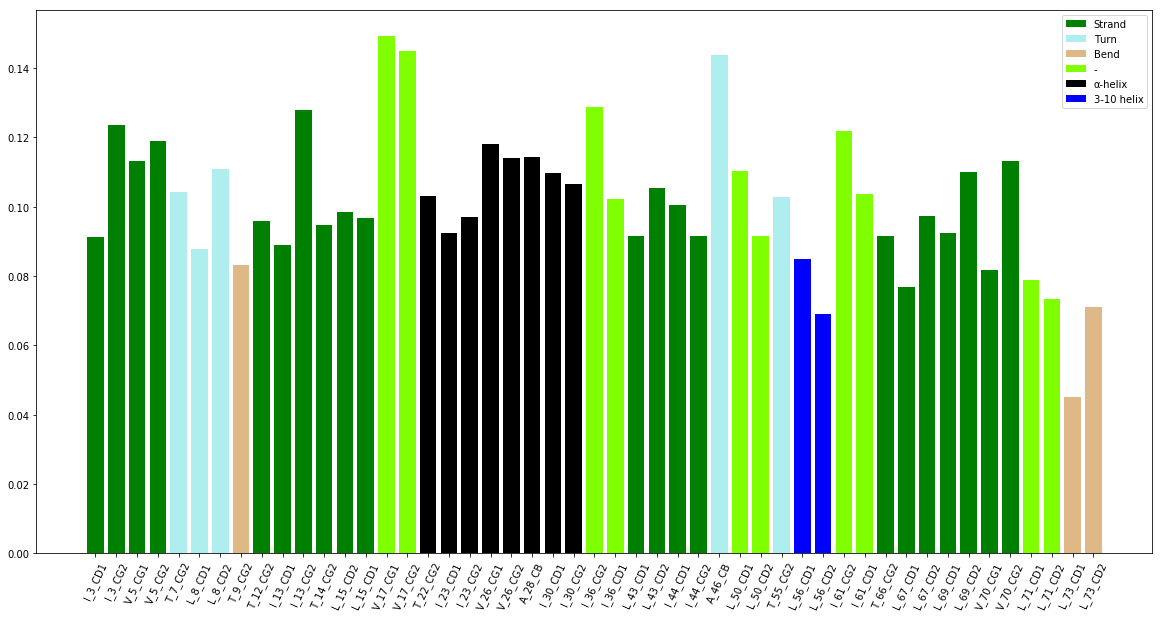

In [21]:
height = parameter_order_2
use =set()
plt.figure(figsize=(20,10))
for j in range(len(height)):
    label = secondary_structure[j]
    if label in use:
        label = None
    plt.bar(y_pos[j], height[j], color=color[j], label=label)
    use.add(secondary_structure[j])
plt.xticks(y_pos, bars, rotation=65)
plt.legend()
plt.show()